# VISUALISATION NOTEBOOK
Notebook created for 28.11 meeting figures and data

In [1]:
import pandas as pd
import pickle
import random
import numpy as np
# Let's look at making the FAQ list better
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
faq_path = '/Users/margheritarosnati/Documents/DS/2018-2/DSLab/DSL2018-Proj-ETH-IT/data/11-24-faq_dat_cleaned.csv'
tix_path = '/Users/margheritarosnati/Documents/DS/2018-2/DSLab/DSL2018-Proj-ETH-IT/data/11-24-ticket_dat.csv'

In [3]:
ticket_dat = pd.read_csv(tix_path)
faq_dat = pd.read_csv(faq_path)

In [12]:
print(ticket_dat.shape, faq_dat.shape )
# we'll have to work on these two at some point (soon!)
ticket_dat.fillna('', inplace=True)
faq_dat.fillna('', inplace=True)

(4250, 7) (277, 7)


In [128]:
# Create data lists
faq_ques = list(faq_dat.question)
n_faq_ques = len(faq_ques)

faq_ans = list(faq_dat.answer_title + " " + faq_dat.answer)
n_faq_ans = len(faq_ans)

ticket_ques = list(ticket_dat.question)
n_ticket_ques = len(ticket_ques)

ticket_ans = list(ticket_dat.answer)
n_ticket_ans = len(ticket_ans)

In [15]:
print( len(faq_ans), len(ticket_ans))

277 4250


In [18]:
# initialise model
TFiDF = TfidfVectorizer(strip_accents='unicode', lowercase=True,analyzer='word')
# create matrix: rows = all ans; cols = TI-IDF weighted word vector
all_ans = list(faq_ans) + list(ticket_ans)
TFiDF.fit(all_ans)
faq_mat = TFiDF.transform(faq_ans)
tix_mat = TFiDF.transform(ticket_ans)
# DEBUG:
print(faq_mat.shape,tix_mat.shape, len(faq_ans), len(ticket_ans), len(all_ans))

(277, 15926) (4250, 15926) 277 4250 4527


In [20]:
# Calculate similarities between faq ans and ticket ans
SM = cosine_similarity(faq_mat, tix_mat)

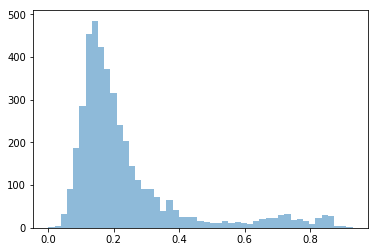

In [22]:
# take highest scoring FAQ per ticket
# plot similarity distribution
strength_FAQ_ticket = np.max(SM, axis=0)
bins =  np.linspace(0, max(strength_FAQ_ticket),50)
plt.hist(strength_FAQ_ticket, bins,alpha=.5, range=(0,1))
plt.show()

In [30]:
# some stats:
thres = np.asarray([0.5, 0.3, 0.2, 0.1])
denom = len(strength_FAQ_ticket)
print([round(np.sum(strength_FAQ_ticket>i)/denom,2) for i in thres])

[0.09, 0.19, 0.4, 0.91]


In [31]:
# VISUALISATION
FAQ_per_ticket = np.argmax(SM, axis=0)
#unique, counts = np.unique(FAQ_per_ticket, return_counts=True)

In [95]:
# creating some samples
subspace =np.nonzero(strength_FAQ_ticket<0.2)
a = random.sample(list(subspace[0]), 1)[0]
b = FAQ_per_ticket[a] 

In [99]:
# Looking at samples created
#print("Similarity score: ", strength_FAQ_ticket[a], '\t\t[',a,',',b,'],')
#print('\nTicket: ques:\t', ticket_ques[a], '\n\ntick_ans:\t', ticket_ans[a])
#print('\n\nFAQ: ques:\t', faq_ques[b], '\n\nFAQ_ans:\t', faq_ans[b])

In [98]:
# samples in 29.11 presentation
samples = {
    50:[299, 171],
    30:[ 2613 , 12 ],
    20: [ 61 , 172 ],
    'vals': [57,31,13]
}

In [103]:
# allocate <50% sim to -1
med = np.median(strength_FAQ_ticket)
# to give you a feel:
print(np.median(SM), np.median(strength_FAQ_ticket))

0.037441657171690436 0.17883005550064696


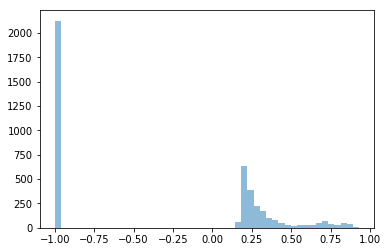

In [110]:
# try I: med over all similarities
# look at distribution
sf2t = np.copy(strength_FAQ_ticket)
sf2t[sft2<med] = -1
f2t = np.copy(FAQ_per_ticket)
f2t[sft2<med] = -1
bins =  np.linspace(-1, max(strength_FAQ_ticket),50)
plt.hist(sft2, bins,alpha=.5)
plt.show()

In [111]:
unique, counts = np.unique(FAQ_per_ticket, return_counts=True)
u2, c2 = np.unique(f2t, return_counts=True)

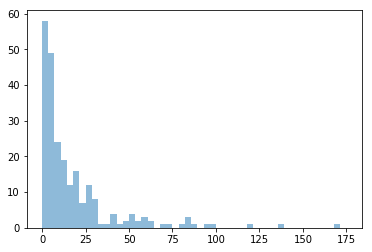

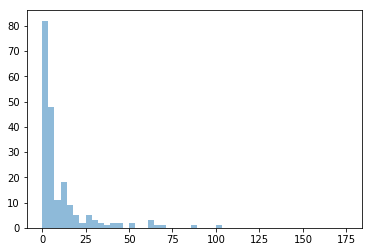

In [116]:
bins =  np.linspace(0, 175,50)
plt.hist(counts, bins,alpha=.5)
plt.show()
plt.hist(c2, bins,alpha=.5)
plt.show()

In [ ]:
# next steps: check what the low ones are getting associated to: is it justified or not?
# maybe think of similarity to closest ticket instead of classification to new ticket?

In [122]:
x= np.array([1,2,3,4,5,6,7,8,9,0])
#np.array_split(np.random.shuffle(x),3)
np.random.shuffle(x)
x

array([9, 6, 2, 1, 7, 4, 0, 5, 3, 8])

In [132]:
index = np.arange(0, len(ticket_ques))
np.random.shuffle(index)
wot = np.array_split(index,5)

In [136]:
#wot[0]

In [141]:
# extract features
matrix = TFiDF.transform(ticket_ques)

# calculate similarities
sim_matrix = cosine_similarity(matrix)
for i in range(len(sim_matrix)):
    sim_matrix[i, i] = 0



#for i in range(5):

In [142]:
# Cross validation:
index = np.arange(0, len(ticket_ques))
np.random.shuffle(index)
splits = np.array_split(index,5)

In [150]:
#SM = cosine_similarity(faq_mat, tix_mat)
#FAQ_per_ticket = np.argmax(SM, axis=0)
temp = sim_matrix[list(set(index) - set(splits[0])),:]
mapping = temp[:,splits[0]]


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3400,) (850,) 

In [168]:
#list(set(index) - set(splits[0]))

temp = sim_matrix[list(set(index) - set(splits[0])),:]
mapping = np.argmax(temp[:,splits[0]], axis=0)
np.sum(FAQ_per_ticket[mapping] == FAQ_per_ticket[splits[0]])/len(splits[0])
#FAQ_per_ticket[list(splits[0])].shape
#mapping.shape
#splits[0]

0.015294117647058824

In [172]:
scores = np.zeros(5,)

In [173]:
scores[0] = np.sum(FAQ_per_ticket[mapping] == FAQ_per_ticket[splits[0]])/len(splits[0])

In [174]:
scores

array([0.01529412, 0.        , 0.        , 0.        , 0.        ])